# AIDI-2000-01 Final Project-Implement a Chatbot
Team: Chutu Li, Keng Hin Cheong, Loc Nguyen

# 1. Loading Necessary Starting Libraries

In [1]:
#!pip install wikipedia

# Hide all the warnings
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
    
# Import essential libraries to start
import spacy
import wikipedia
from PIL import Image

## SPACY
It is powerful in determining the part of speech of any text dataset to be fed into it.
We can see this with the following chart in which we can see in detail what each word's role in a sentence is.
Thereby, we can detect which types of keywords will be focused on later.

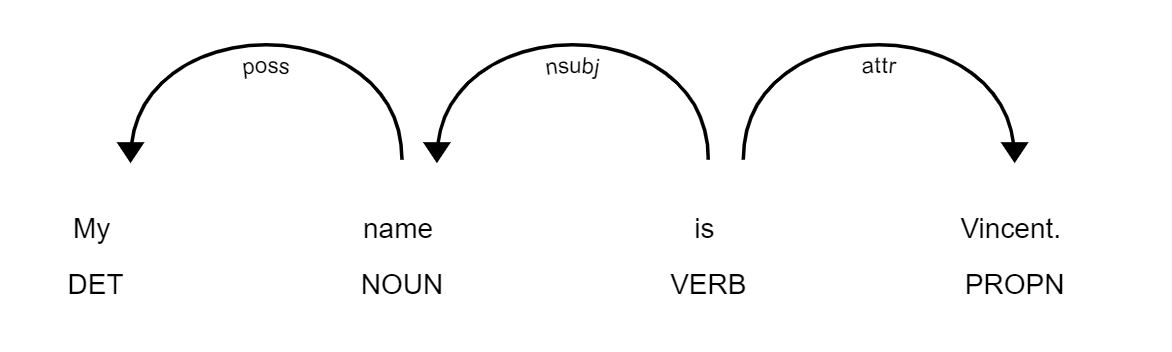

In [5]:
# Load the image
img = Image.open('chart.jpeg')
# Show the image
img

With the given question "What are you doing?" which will be tokenized, the part of speech and role of them in the sentence  will be identified 

- what NOUN WP dobj doing ROOT
- are VERB VBP aux doing ROOT
- you PRON PRP nsubj doing ROOT
- doing VERB VBG ROOT doing ROOT
+ ? PUNCT . punct doing ROOT

then the intention will be identified

- question type is: what
- subject is: you
- detail is: doing

# 2. Chatbot Preparation and Building

In [3]:
# Load spacy package and assign it to nlp
nlp = spacy.load('en_core_web_sm')

# Analysis of the user's entry
def tag():
    question_type = ""
    subject = ""
    detail = ""
    # Form the analysis
    for t in user_doc:
        print (t.text,t.pos_,t.tag_,t.dep_,t.head.text,t.head.dep_)
        if t.tag_ == "WRB":
            question_type = t.text.lower()
            
        elif t.tag_ == "WP":
            question_type = t.text.lower()
            
        elif t.dep_ in ("nsubj" ,"nsubjpass" ,"attr", "dobj"):
            if t.dep_ == "det":
                if any(i.isupper() for i in t.text):
                    subject += " " + t.text.lower()
            else:
                subject += " " + t.text.lower()

        elif t.head.dep_ in ("nsubj" ,"nsubjpass" ,"attr", "dobj"):
            if t.dep_ == "det":
                if any(i.isupper() for i in t.text):
                    subject += " " + t.text.lower()
            else:
                subject += " " + t.text.lower()
                
        elif t.dep_ == "ROOT":
            detail = t.text.lower()
    # Output the analysis        
    if question_type != "" and subject != "" and detail != "":
        print ("\nQuestion type: " + question_type)
        print ("Subject: " + subject)
        print ("Detail: " + detail)
        print('-------')
        print('My Response:')
        return (question_type, subject, detail)
    # Show a message when the entry is beyond the designed range of understanding of the chatbot
    else:
        print('-------')
        print('My Response:')
        print ("Sorry! That's not something I can answer for! Please try to ask me something else...\n")

# Reply to the user's entry
def response():
    # Reference the entry's subject to Wikipedia 
    search = wikipedia.search(subject)
    if search == []:
        print ("Sorry no page found")
    summary = wikipedia.summary(subject)
    summary_doc = nlp(summary)
    sentences = summary_doc.sents
    answers = []
    # Gives a message when there is no answer to the question entered
    non_answer = ["The answer is...Just kidding! Actually, I don't have an answer for it!\n"]
 
    # Deal with searching for answers for input questions starting with "who"
    if question_type == "who":
        if detail == "is":
            answers.append(wikipedia.summary(subject,sentences = 1))
        else:
            for sents in sentences:
                for w in sents:
                    doc = nlp(w.text)
                    ents = doc.ents
                    for e in ents:
                        if e.label_ == "PERSON" and w.text != subject:
                            answers.append(sents)
                            break
                    else:
                        continue
                    break
                if len(answers) > 3:
                    break
        # Dealing with the situation of when there is no answer
        if answers != []:
            return answers
        else:
            return non_answer
    # Deal with searching for answers for input questions starting with "what"
    if question_type == "what":
        if detail == "is":
            answers.append(wikipedia.summary(subject,sentences = 1))
        else:
            for sents in sentences:
                for w in sents:
                    if w.text == subject:
                        answers.append(sents)
                        break
                    else:
                        continue
                    break
                if len(answers) > 3:
                    break
        # Dealing with the situation of when there is no answer
        if answers != []:
            return answers
        else:
            return non_answer
    # Deal with searching for input questions starting with "when"    
    if question_type == "when":
        for sents in sentences:
            # print (sents)
            for w in sents:
                # print (w.text)
                doc = nlp(w.text)
                ents = doc.ents
                for e in ents:
                    if e.label_ == "DATE":
                        answers.append(sents)
                        break
                else:
                    continue
                break
            if len(answers) > 3:
                break
        # Dealing with the situation of when there is no answer
        if answers != []:
            return answers
        else:
            return non_answer
    # Deal with searching for input questions starting with "why"
    if question_type == "why":
        for sents in sentences:
            for w in sents:
                if w.text in (detail, "because", "due to","as a result","reason"):
                    answers.append(sents)
                    break
            if len(answers) > 3:
                break
        # Dealing with the situation of when there is no answer
        if answers != []:
            return answers
        else:
            return non_answer
    # Deal with searching for input questions starting with "where"
    if question_type == "where":
        for sents in sentences:
            for w in sents:
                doc = nlp(w.text)
                ents = doc.ents
                for e in ents:
                    if e.label_ == "GPE" or e.label_ == "LOC":
                        answers.append(sents)
                        break
                else:
                    continue
                break
            if len(answers) > 3:
                break                
        # Dealing with the situation of when there is no answer
        if answers != []:
            return answers
        else:
            return non_answer
    # Deal with searching for input questions starting with "how"
    if question_type == "how":
        for sents in sentences:
            for w in sents:
                if w.text in ("by","using",detail):
                    answers.append(sents)
                    break
            if len(answers) > 3:
                break
        # Dealing with the situation of when there is no answer
        if answers != []:
            return answers
        else:
            return non_answer
        
# Recording the selected best answers when there is more than one answer         
def write():
    file = open("Recorded Answers","a+")
    file.write("\n"+ user_input)
    file.write("\n"+ best_ans)


# 3. Operating and Testing the Chatbot

In [4]:
# Running the chatbot
while True:
    # Ask for input from user
    user_input = input('Ask me something, my boss! I will try my best to answer you! (type "quit" to exit): ')
    # Handle stopping the chatbot
    if user_input == "quit":
        print('\nExited..Thanks for using me! Have a good day!')
        break
    # Pre-process user's input    
    user_doc = nlp(user_input)   
    # Show analysis of the user's entry
    print('\n-------')
    print('Analysis of Your Entry:\n')
    try:
        question_type, subject, detail = tag()
    except:
        continue
    
    # Show the chatbot's response
    try:
        response()
    except:
        print("Ummm...I don't quite get you...Would you please be more specific or ask me in a different way?")
        continue
    else:
        answers = response()
        count = 1
        for a in answers:
            print ( "\n"+ str(count) + ")")
            print (a)
            count +=1
        if len(answers) >1:
            # Deal with problems of user's inputs outside of the range of the answer list
            while True:
                try:    
                    answer_input = int(input('\nWhich answer do you think is the most accurate one?\nType in the answer number on the list above: '))
                    best_ans = str(answers[answer_input - 1])
                except:
                    print('Please enter a number on the list!')
                    continue
                else:
                    print ('\nOK, boss! Then my final answer for your question is:')
                    print (best_ans)
                    write()
                    break

Ask me something, my boss! I will try my best to answer you! (type "quit" to exit): hey?

-------
Analysis of Your Entry:

hey INTJ UH ROOT hey ROOT
? PUNCT . punct hey ROOT
-------
My Response:
Sorry! That's not something I can answer for! Please try to ask me something else...

Ask me something, my boss! I will try my best to answer you! (type "quit" to exit): hahaha

-------
Analysis of Your Entry:

hahaha PROPN NNP ROOT hahaha ROOT
-------
My Response:
Sorry! That's not something I can answer for! Please try to ask me something else...

Ask me something, my boss! I will try my best to answer you! (type "quit" to exit): what is this?

-------
Analysis of Your Entry:

what PRON WP attr is ROOT
is AUX VBZ ROOT is ROOT
this DET DT nsubj is ROOT
? PUNCT . punct is ROOT

Question type: what
Subject:  this
Detail: is
-------
My Response:
Ummm...I don't quite get you...Would you please be more specific or ask me in a different way?
Ask me something, my boss! I will try my best to answer yo

# 4. Conclusion

After some testings on the chatbot, we can conclude that we have successfully developed a chatbot that can help children quickly acquire basic knowledge for their reading and studying.
The chatbot uses Spacy natural language process to understand questions input by the user. This chatbot can not only handle special questions with the questioning words “what”, “why”, “when”, etc., but use keywords in the questions as search criteria to find and extract information from corresponding Wikipedia entries. And lastly, it gives all concise answers to the user. On the other hand, when the chatbot does not understand the out-of-range inputs or simply has no answer for the entry, it will respond accordingly to guide the user to change his input. Therefore, this chatbot can certainly be used as a student supportive education system, even for students at their young age. For future improvements of the chatbot, we could try to expand the range of the knowledge referencing of the chatbot, so that it can cover broader range of inputs.
